# Part1: Data Preprocessing

## Import Packages and Loading The Data

In [5]:
! nvidia-smi

Sun Dec 11 06:37:38 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P0    27W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
! pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import opendatasets as od
import os
import pathlib
import random

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#from tensorflow.keras.utils import image_dataset_from_directory as img_dir
from tensorflow.keras.preprocessing import  image_dataset_from_directory as img_dir

import tensorflow as tf
from tensorflow.keras import layers



In [ ]:
od.download_kaggle_dataset( "https://www.kaggle.com/datasets/ibrahimserouis99/one-piece-image-classifier?search=image+class" ,"data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 
Your Kaggle username: mahmoudatiaeadatia
Your Kaggle Key: ··········


 19%|█▊        | 481M/2.53G [00:24<01:45, 20.9MB/s]

In [ ]:
for dirpath, dirnames, filenames in os.walk("/content/data"):
  print(f"there is {len(dirnames)} dirs and {len(filenames)} files in {dirpath}")

## Exploring the data

Visualise some random images

In [19]:
def view_random_images( target_class):
  ''' visualise random images from our dataset '''
  # creating a list of targeted class images 
  images_list = os.listdir("/content/data/one-piece-image-classifier/Data/Data/{}".format(target_class))
  # choose a random image 
  rand_image = random.sample(images_list,1)[0]
  #plot the images
  img = mpimg.imread("/content/data/one-piece-image-classifier/Data/Data/{}/{}".format(target_class,rand_image))
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)
  print("the shape of the image is{}".format(img.shape))


  return img
     

the shape of the image is(350, 225, 3)


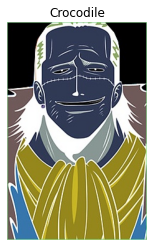

In [25]:
img = view_random_images("Crocodile")

In [26]:
os.listdir("/content/data/one-piece-image-classifier")

['Data', 'classnames.txt']

In [35]:
# reading class names
with open("/content/data/one-piece-image-classifier/classnames.txt", "r") as f :
  class_names = f.read()

In [42]:
class_names
class_list = [class_name.strip() for class_name in class_names.split("\n")]

In [68]:
class_list

['Ace',
 'Akainu',
 'Brook',
 'Chopper',
 'Crocodile',
 'Franky',
 'Jinbei',
 'Kurohige',
 'Law',
 'Luffy',
 'Mihawk',
 'Nami',
 'Rayleigh',
 'Robin',
 'Sanji',
 'Shanks',
 'Usopp',
 'Zoro']

the shape of the image is(400, 238, 3)


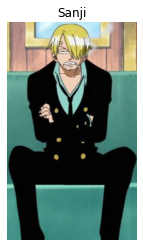

In [55]:
random_class = random.choice(class_list)
img = view_random_images(random_class)

## Image preprocessing

In [75]:
data_dir = pathlib.Path("/content/data/one-piece-image-classifier/Data/Data/")


In [76]:
data_dir

PosixPath('/content/data/one-piece-image-classifier/Data/Data')

In [87]:
train = img_dir("/content/data/one-piece-image-classifier/Data/Data",
     seed=123,
      label_mode="categorical",
      subset = "training",
      validation_split= 0.2
       )

Found 11737 files belonging to 18 classes.
Using 9390 files for training.


In [88]:
valid = img_dir("/content/data/one-piece-image-classifier/Data/Data",
      seed=123,
      label_mode="categorical",
      subset = "validation",
      validation_split= 0.2
       )

Found 11737 files belonging to 18 classes.
Using 2347 files for validation.


In [93]:
valid.class_names

['Ace',
 'Akainu',
 'Brook',
 'Chopper',
 'Crocodile',
 'Franky',
 'Jinbei',
 'Kurohige',
 'Law',
 'Luffy',
 'Mihawk',
 'Nami',
 'Rayleigh',
 'Robin',
 'Sanji',
 'Shanks',
 'Usopp',
 'Zoro']

In [117]:
list(valid.take(1))[0][0][0].shape

TensorShape([256, 256, 3])

it is already onehot encoded

# Part2:Modeling

In [148]:
inputs = layers.Input(shape=(256, 256, 3), name = "Input Layer")
x = layers.Rescaling(1./255) (inputs)
x = layers.Conv2D(filters = 5,kernel_size= 1) (x)
x= layers.GlobalMaxPool2D()(x)
outputs = layers.Dense(18, activation = "softmax") (x)

model_1 = tf.keras.Model(inputs , outputs)


In [149]:
model_1.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Layer (InputLayer)    [(None, 256, 256, 3)]     0         
                                                                 
 rescaling_7 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 5)       20        
                                                                 
 global_max_pooling2d (Globa  (None, 5)                0         
 lMaxPooling2D)                                                  
                                                                 
 dense_19 (Dense)            (None, 18)                108       
                                                                 
Total params: 128
Trainable params: 128
Non-trainable params: 0
_____________________________________________________________

In [150]:
model_1.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = "accuracy"
)

In [ ]:
history_1 = model_1.fit(train , 
                        validation_data = valid,
                        epochs = 5,
                        )

Epoch 1/5
 64/294 [=====>........................] - ETA: 1:34 - loss: 2.9515 - accuracy: 0.0410